In [234]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [235]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data = train_data.append(test_data)

temp = train_data.iloc[891:]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 42.5+ KB


,Sex,Survived
0,female,0.742
1,male,0.189


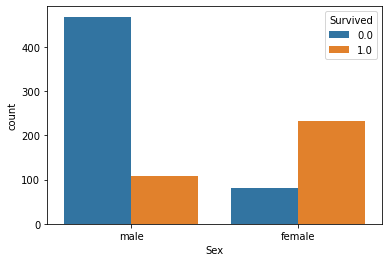

In [236]:
import seaborn as sns

# women = train_data.loc[train_data.Sex == 'female', 'Survived']
# rate_women = sum(women)/len(women)

# print("% of women who survived:", rate_women)

sns.countplot(train_data['Sex'], hue=train_data['Survived'])
display(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().round(3))

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


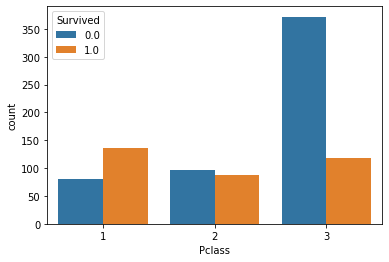

In [237]:
sns.countplot(train_data['Pclass'], hue=train_data['Survived'])
display(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().round(3))

In [238]:
#sns.countplot(train_data['Fare'], hue=train_data['Survived'])

train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

train_data[train_data['Fare'].isnull()]

train_data['Fare_new'] = pd.qcut(train_data['Fare'], 5)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.854]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(41.579, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.854, 10.5]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(41.579, 512.329]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.854, 10.5]"


,SibSp,Survived
0,0,0.345
1,1,0.536
2,2,0.464
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


,Family,Survived
0,0,0.304
1,1,0.553
2,2,0.578
3,3,0.724
4,4,0.200
5,5,0.136
6,6,0.333
7,7,0.000
8,10,0.000


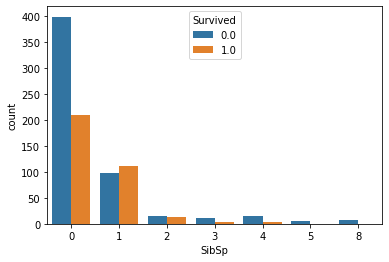

In [239]:
sns.countplot(train_data['SibSp'], hue=train_data['Survived'])
display(train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().round(3))

train_data['Family'] = train_data['SibSp'] + train_data['Parch']
train_data.head()
display(train_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().round(3))

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


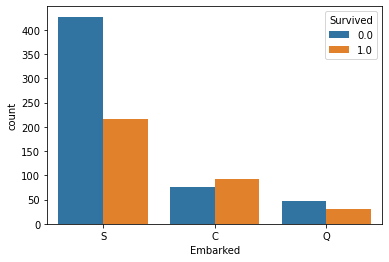

In [240]:
sns.countplot(train_data['Embarked'], hue=train_data['Survived'])
display(train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().round(3))

In [241]:
#display(train_data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().round(3))
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data[train_data['Age'].isnull()]
train_data['Age_new'] = pd.qcut(train_data['Age'], 8)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_new,Family,Age_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.854]",1,"(0.169, 25.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(41.579, 512.329]",1,"(30.5, 80.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.854, 10.5]",0,"(25.0, 30.5]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(41.579, 512.329]",1,"(30.5, 80.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.854, 10.5]",0,"(30.5, 80.0]"


In [242]:
train_data['Embarked'] = train_data['Embarked'].fillna('C')
train_data[train_data['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_new,Family,Age_new


In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

train_data_new = train_data.iloc[:891]
test_data_new = train_data.iloc[891:]

features  = ['Pclass', 'Sex', 'SibSp', 'Embarked','Fare_new', 'Family']

#X = train_data_new.drop(labels = ['PassengerId','Survived'], axis=1)
y = train_data_new['Survived']
X = pd.get_dummies(train_data_new[features])
#X_Submit = test_data.drop(labels=['PassengerId','Survived'],axis=1)
X_Submit = pd.get_dummies(test_data_new[features])
model = RandomForestClassifier(n_estimators=250, random_state=2, min_samples_split=20, oob_score=True)
model.fit(X, y)
print("score: %.5f" %(model.oob_score_))
predictions = model.predict(X_Submit)
predictions = predictions.astype(int)
#print(predictions)



score: 0.81594


In [244]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#print(output)
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
